# Pymaceuticals Inc.
---

### Analysis

- Relationship: The graph shows a moderate positive correlation between mouse weight and tumor volume in the Capomulin regimen. The linear regression further quantifies this relationship.

Implications: The observed relationship may have biological or therapeutic implications, suggesting that heavier mice might have larger tumors on average when treated with Capomulin. However, further investigation would be needed to understand causation and underlying mechanisms.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame

combined_data=pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")


 
# combined_data=pd.merge(mouse_metadata,study_results)



# Display the data table for preview
display(combined_data.head())

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
num_mice=combined_data['Mouse ID'].nunique()

num_mice


249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint

# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice=combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mice_ids = duplicate_mice["Mouse ID"].unique()

duplicate_mice_ids











array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID.

duplicate_mouseid_data =combined_data[combined_data['Mouse ID'].isin(duplicate_mice_ids)]

duplicate_mouseid_data



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_data = combined_data[~combined_data['Mouse ID'].isin(duplicate_mice_ids)]
display(clean_data.head())


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
num_mice_clean= clean_data['Mouse ID'].nunique()

num_mice_clean



248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.

summary_stats = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg([
   "mean",
   "median",
   "var",
   "std",
   "sem"                                                
])

summary_stats.columns =(
    "Mean Tumor Volume",
    "Median Tumor Volume",
    "Variance Tumor Volume",
    "Tumor Volume Std.Dev.",
    "Tumor Volume Std.Err."
)                       

summary_stats.head()                          
                                                


,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Tumor Volume Std.Dev.,Tumor Volume Std.Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


# summary_stats_advanced = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean" , "median", "var", "std", "sem"]).reset_index()

summary_stats_advanced = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean" , "median", "var", "std", lambda x: x.sem()])

summary_stats_advanced.rename(columns={'<lambda_0>': 'sem'}, inplace=True)


summary_stats_advanced





,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, '# of Observed Mouse Timepoints')

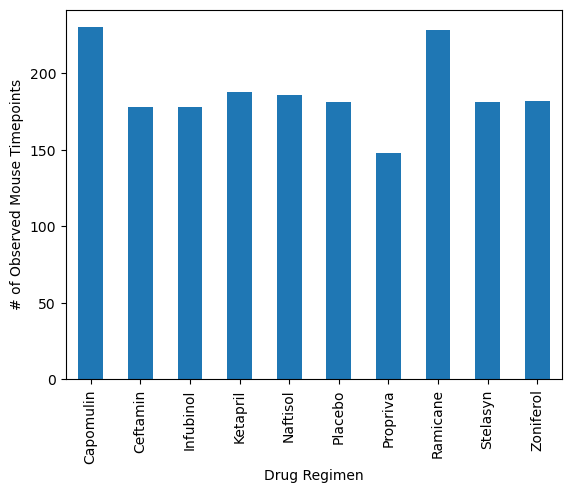

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

regimen_counts = clean_data.groupby('Drug Regimen').size()

regimen_counts.plot(kind='bar')


plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')




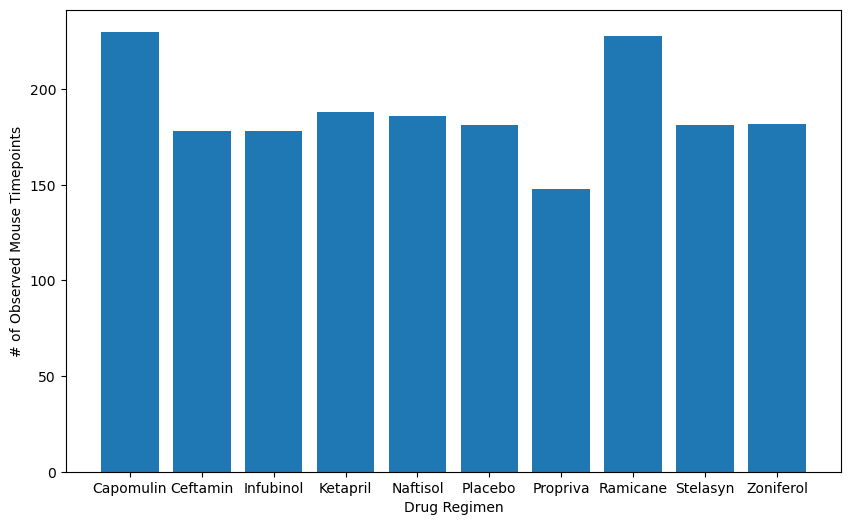

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
regimen_counts= clean_data.groupby('Drug Regimen').size()

plt.figure(figsize=(10,6))

plt.bar(regimen_counts.index, regimen_counts.values)

plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

plt.show()

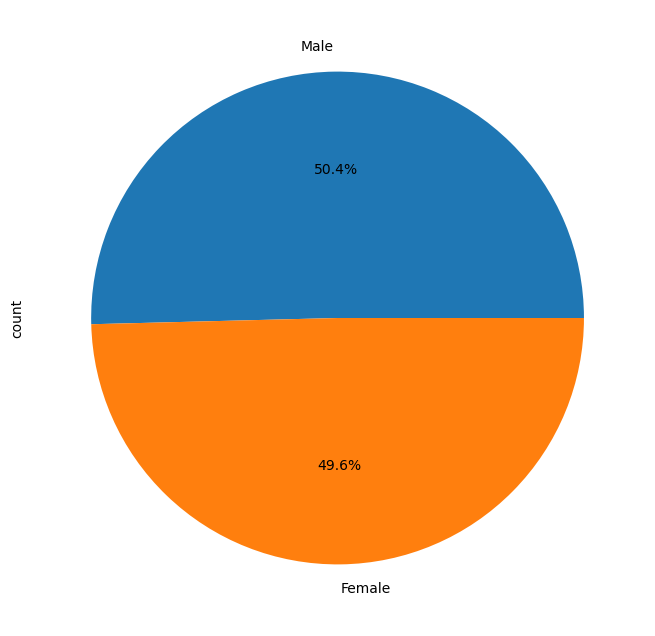

In [11]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
unique_mice= clean_data.drop_duplicates(subset=['Mouse ID'])

# Get the unique mice with their gender
gender_counts = unique_mice['Sex'].value_counts()



# Make the pie chart
plt.figure(figsize=(8,8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')

plt.ylabel('count')

plt.show()

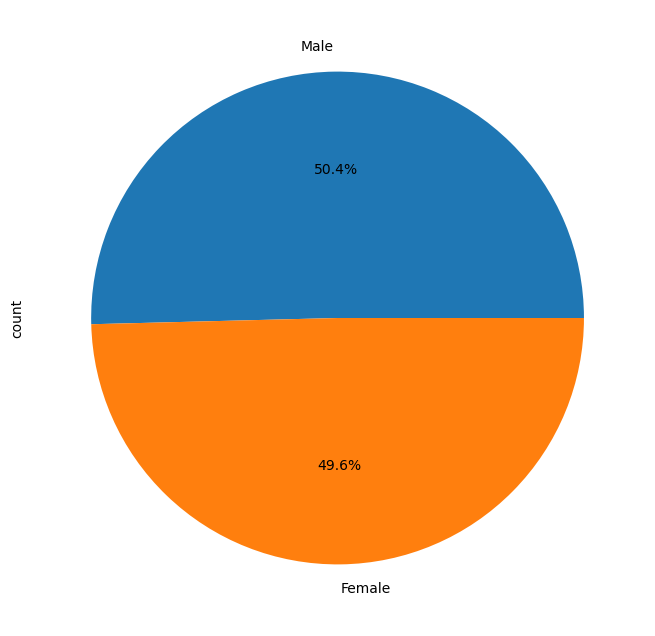

In [12]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
unique_mice2= clean_data.drop_duplicates(subset=['Mouse ID'])
# Get the unique mice with their gender
gender_counts = unique_mice2['Sex'].value_counts()



# Make the pie chart
plt.figure(figsize=(8,8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')

plt.ylabel('count')

plt.show()



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:


# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

last_timepoint_tumor_volume = clean_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

final_tumor_volume = pd.merge(last_timepoint_tumor_volume, clean_data, on=['Mouse ID', 'Timepoint'],how='left')

final_tumor_volume


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [14]:
# Put treatments into a list for for loop (and later for plot labels)

treatment_groups = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes = []


# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatment_groups: 

# Locate the rows which contain mice on each drug and get the tumor volumes

 
   subset = final_tumor_volume[final_tumor_volume['Drug Regimen'] == treatment]

    # add subset
   volumes = subset['Tumor Volume (mm3)']

   tumor_volumes.append(volumes)

   quartiles = volumes.quantile([0.25, 0.5, 0.75])
   Q1= quartiles[0.25]
   Q3 = quartiles[0.75]
   IQR = Q3 - Q1

   # Determine outliers using upper and lower bounds
   lower_bound = Q1 - (1.5 * IQR)
   upper_bound = Q3 + (1.5 * IQR)

   outliers = volumes[(volumes < lower_bound) | (volumes > upper_bound)]
   print(f"{treatment}'s potential outliers: {outliers}")





      




Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


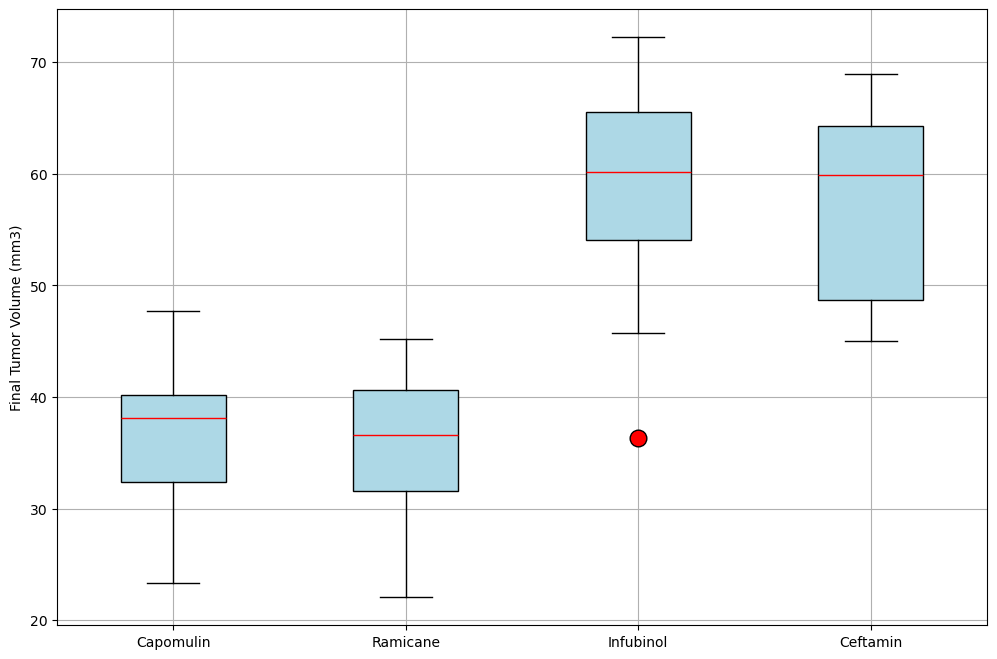

In [15]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
# Step 1: Create a list of treatments
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Step 2: Create a list to store tumor volumes for each treatment group
tumor_volumes = []

# Step 3: Collect tumor volume data for each treatment
for treatment in treatments:
    # Filter the data for the current treatment
    subset = final_tumor_volume[final_tumor_volume['Drug Regimen'] == treatment]
    # Append the tumor volumes to the list
    tumor_volumes.append(subset['Tumor Volume (mm3)'])

# Step 4: Generate the box plot
plt.figure(figsize=(12, 8))
orange_out = dict(markerfacecolor='red',markersize=12)
plt.boxplot(tumor_volumes, labels=treatments, patch_artist=True, boxprops=dict(facecolor='lightblue', color='black'), 
            whiskerprops=dict(color='black'), capprops=dict(color='black'), medianprops=dict(color='red'),flierprops= orange_out)


plt.ylabel('Final Tumor Volume (mm3)')
plt.grid(True)
plt.show()



## Line and Scatter Plots

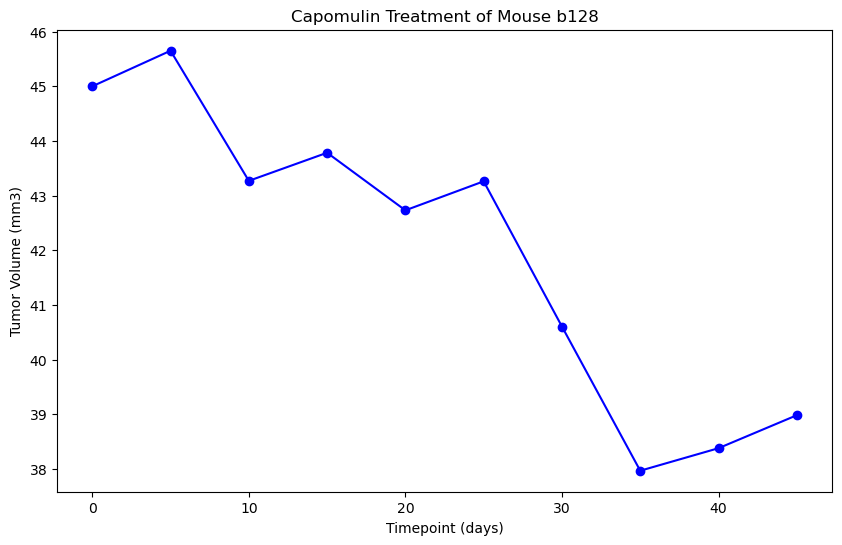

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_data = clean_data[clean_data['Drug Regimen'] == 'Capomulin']
mouse_id = capomulin_data['Mouse ID'].unique()[0]

mouse_data= capomulin_data[capomulin_data['Mouse ID'] == mouse_id]

plt.figure(figsize=(10, 6))
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker='o', color='blue')
plt.title(f'Capomulin Treatment of Mouse {mouse_id}')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()












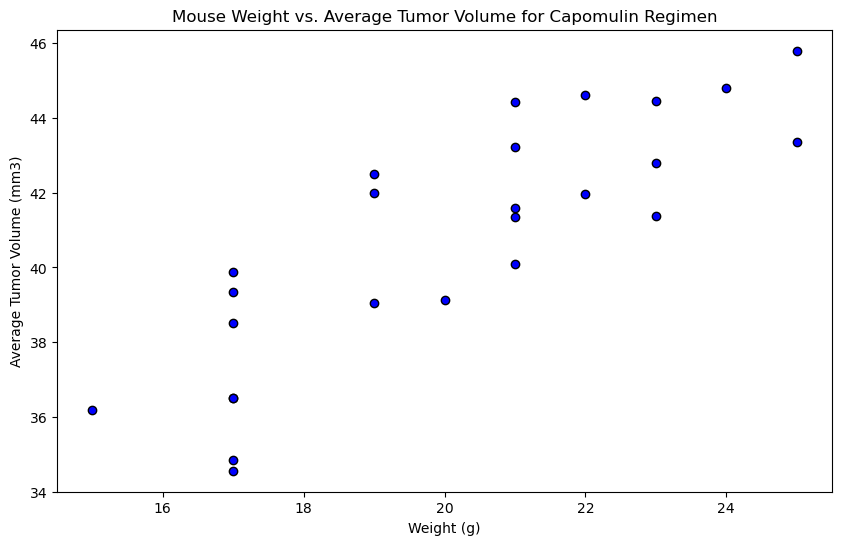

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = clean_data.loc[clean_data['Drug Regimen'] == 'Capomulin']

# Calculate average tumor volume for each mouse
avg_tumor_volume = capomulin_data.groupby('Mouse ID')[['Weight (g)' ,'Tumor Volume (mm3)']].mean()

# Merge with mouse weight data
# Note: If you don't have weight data in final_tumor_volume, you need to merge with another DataFrame containing weight data



# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(avg_tumor_volume['Weight (g)'], avg_tumor_volume['Tumor Volume (mm3)'], color='b', edgecolor='k')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()


## Correlation and Regression

 The Correlation coefficient between mouse weight and the average tumor volume is  0.84


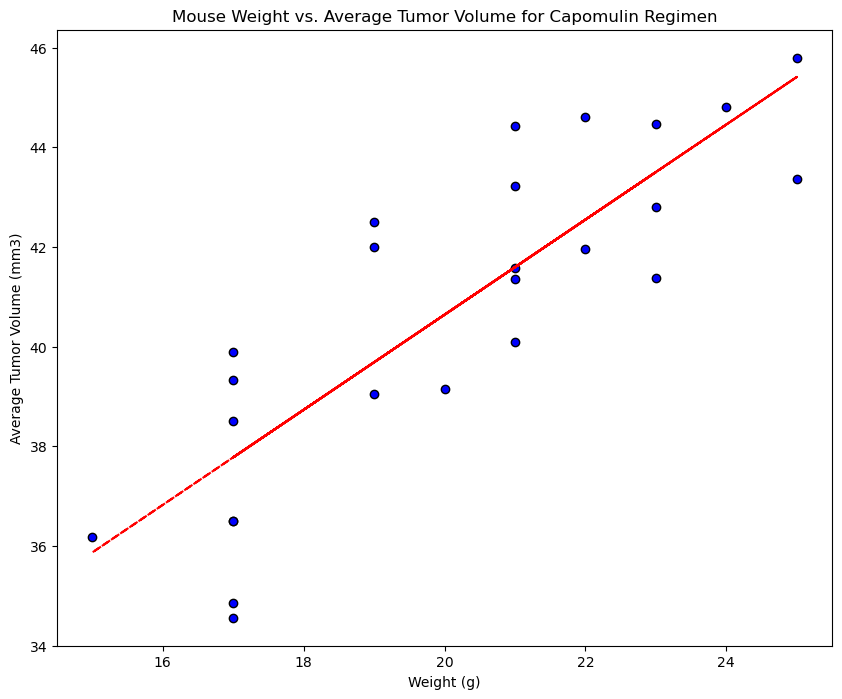

In [20]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Filter data for Capomulin regimen


# Calculate average tumor volume for each mouse


# Calculate average weight for each mouse


# Create DataFrame for analysis


# Calculate correlation coefficient
correlation = avg_tumor_volume['Weight (g)'].corr(avg_tumor_volume['Tumor Volume (mm3)'])
print(f' The Correlation coefficient between mouse weight and the average tumor volume is  {correlation:.2f}')

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(avg_tumor_volume['Weight (g)'], avg_tumor_volume['Tumor Volume (mm3)'])

# Print the linear regression results



# Scatter plot with regression line
plt.figure(figsize=(10, 8))
plt.scatter(avg_tumor_volume['Weight (g)'], avg_tumor_volume['Tumor Volume (mm3)'], color='b', edgecolor='k')
plt.plot(avg_tumor_volume['Weight (g)'], intercept + slope * avg_tumor_volume['Weight (g)'], color='r', linestyle='--')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()



